## This is our Project on Wine Quality Prediction using classification & regression techniques in ML.

In [1]:
# Importing the libaries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

#### We will use both white and red wine datasets for our methods. 

In [2]:
# Importing the dataset for white wine

df_white_wine= pd.read_csv('/Users/shinjinigupta/Desktop/SJSU/SPRING_2021/DATA_245/PROJECT/Datasets/winequality-white.csv')
df_white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [3]:
# Importing the dataset for red wine

df_red_wine= pd.read_csv('/Users/shinjinigupta/Desktop/SJSU/SPRING_2021/DATA_245/PROJECT/Datasets/winequality-red.csv')
df_red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Data Preprocessing

### We will start with white wine dataset and do the same pre processing for the red wine dataset

#### For white wine dataset:

In [4]:
# Checking for any missing Values

print(df_white_wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#### There's no missing values :)

In [5]:
# Checking for categorical values

df_white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


#### The datatypes of all the feature columns are float and the target column is int, hence no categorical values. :)

In [6]:
# Checking for duplicate rows in the dataset

df_white_wine=df_white_wine.drop_duplicates()
df_white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [7]:
# Renaming the columns names by adding "_"  in between column names

df_white_wine.columns = df_white_wine.columns.str.replace(" ", "_")
df_white_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#### We are doing a binomial classification for all the classification methods in our project. Hence we will add a column name "Quality_rank" in a copy of our dataset to perform the classification methods on it.

In [8]:
# Creating a copy of the dataset df_white_wine

df_white_wine_classify = df_white_wine.copy()
df_white_wine_classify

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [9]:
# Creating a quality_rank column for binomial classification of target variable(quality)

df_white_wine_classify['quality_rank'] = [1 if x >= 6 else 0 for x in df_white_wine_classify['quality']]
df_white_wine_classify

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_rank
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [10]:
# Separating the feature variables and the target variable

X_white_classify = df_white_wine_classify.drop(['quality','quality_rank'], axis = 1)
y_white_classify = df_white_wine_classify['quality_rank']

In [11]:
# To see good and bad wine counts

df_white_wine_classify['quality_rank'].value_counts()

1    2613
0    1348
Name: quality_rank, dtype: int64

In [12]:
# Normalizing feature variables to bring them to same scale

X_features_white_classify = X_white_classify
X_white_classify = StandardScaler().fit_transform(X_white_classify)

#### For the regression methods, we would use the the datasets as is and predict its quality.

In [13]:
# Separating the feature variables and the target variable

X_white_reg = df_white_wine.drop(['quality'], axis = 1)
y_white_reg = df_white_wine['quality']

In [14]:
# To see good and bad wine counts

df_white_wine['quality'].value_counts()

6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

In [15]:
# Normalizing feature variables to bring them to same scale

X_features_white_reg = X_white_reg
X_white_reg = StandardScaler().fit_transform(X_white_reg)

#### For red wine dataset:

In [16]:
# Checking for any missing Values

print(df_red_wine.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


#### There's no missing values :)

In [17]:
# Checking for categorical values

df_red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### The datatypes of all the feature columns are float and the target column is int, hence no categorical values. :)

In [18]:
# Checking for duplicate rows in the dataset

df_red_wine=df_red_wine.drop_duplicates()
df_red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [19]:
# Renaming the columns names by adding "_"  in between column names

df_red_wine.columns = df_red_wine.columns.str.replace(" ", "_")
df_red_wine

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### We are doing a binomial classification for all the methods in our project. Hence we will add a column name "Quality_rank" in a copy of our dataset to perform the classification methods on it.

In [20]:
# Creating a copy of the dataset df_red_wine

df_red_wine_classify = df_red_wine.copy()
df_red_wine_classify

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [21]:
# Creating a quality_rank column for binomial classification of target variable(quality)

df_red_wine_classify['quality_rank'] = [1 if x >= 6 else 0 for x in df_red_wine_classify['quality']]
df_red_wine_classify

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality_rank
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [22]:
# Separating the feature variables and the target variable

X_red_classify = df_red_wine_classify.drop(['quality','quality_rank'], axis = 1)
y_red_classify = df_red_wine_classify['quality_rank']

In [23]:
# To see good and bad wine counts

df_red_wine_classify['quality_rank'].value_counts()

1    719
0    640
Name: quality_rank, dtype: int64

In [24]:
# Normalizing feature variables to bring them to same scale

X_features_red_classify = X_red_classify
X_red_classify = StandardScaler().fit_transform(X_red_classify)

#### For the regression methods, we would use the the datasets as is and predict its quality.

In [25]:
# Separating the feature variables and the target variable

X_red_reg = df_red_wine.drop(['quality'], axis = 1)
y_red_reg = df_red_wine['quality']

In [26]:
# To see good and bad wine counts

df_red_wine['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [27]:
# Normalizing feature variables to bring them to same scale

X_features_red_reg = X_red_reg
X_red_reg = StandardScaler().fit_transform(X_red_reg)

## Data Modelling

### First data modelling will be done on white wine dataset and the same will be done for red wine dataset

#### For White Wine dataset : Classification using Random Forest Classifier

In [28]:
# Importing libraries for data modelling

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [29]:
# Dividing the data into training and test data in the ration of 7:3

X_train_white_classify, X_test_white_classify, y_train_white_classify, y_test_white_classify = train_test_split(X_white_classify, y_white_classify, test_size=.30, random_state=10)

In [30]:
# Fitting the Random Forest Classification model

white_wine_rf_classify = RandomForestClassifier(n_estimators=100,random_state = 0)
white_wine_rf_classify.fit(X_train_white_classify, y_train_white_classify)

RandomForestClassifier(random_state=0)

In [31]:
# Model prediction on test data

y_pred_white_classify = white_wine_rf_classify.predict(X_test_white_classify)

In [32]:
# To see the parameters used in the classifier

from pprint import pprint

pprint(white_wine_rf_classify.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [33]:
# Calculating the accuracy of the prediction

white_wine_classify_accuracy=accuracy_score(y_test_white_classify,y_pred_white_classify)*100
white_wine_classify_accuracy

78.55340622371742

In [34]:
# Fine tuning with randomized search

from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

random_grid={'criterion':['gini','entropy'], 
                'max_depth':[1,2,3,4,5,6,7,None]}

pprint(random_grid)

{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}


In [35]:
# Creating the randomized search model
white_wine_rf_classify_random = RandomizedSearchCV(estimator = white_wine_rf_classify, param_distributions = random_grid, cv = 100, verbose=2, random_state=42, n_jobs = -1)

# Fitting the randomized search model
white_wine_rf_classify_random.fit(X_train_white_classify, y_train_white_classify)

Fitting 100 folds for each of 10 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   15.7s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.8min finished


RandomizedSearchCV(cv=100, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7,
                                                      None]},
                   random_state=42, verbose=2)

In [36]:
# Selecting the best parameter

white_wine_rf_classify_random.best_params_

{'max_depth': None, 'criterion': 'entropy'}

In [37]:
# Selecting the best estimator

best_random_white_wine_classify= white_wine_rf_classify_random.best_estimator_
best_random_white_wine_classify

RandomForestClassifier(criterion='entropy', random_state=0)

In [38]:
# Model prediction on test data

best_random_y_pred_white_classify = best_random_white_wine_classify.predict(X_test_white_classify)

In [39]:
# Calculating the accuracy of the prediction

best_random_white_wine_classify_accuracy=accuracy_score(y_test_white_classify,best_random_y_pred_white_classify)*100
best_random_white_wine_classify_accuracy

78.30109335576114

In [40]:
# Comparing the model accuracy before and after fine tuning

print('Before :', white_wine_classify_accuracy,'\n' 'After : ', best_random_white_wine_classify_accuracy)

Before : 78.55340622371742 
After :  78.30109335576114


#### Evaluation metrices

In [44]:
import sys
!{sys.executable} -m pip install scikit-plot

In [45]:
# Importing the libraries for evalution metric

import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from inspect import signature

In [46]:
# Calculating the precision score

precision_score(y_test_white_classify, best_random_y_pred_white_classify)

0.79456906729634

In [47]:
# Calculating the recall score

recall_score(y_test_white_classify, best_random_y_pred_white_classify)

0.8890356671070013

In [48]:
# Calculating the f1 score

f1_score(y_test_white_classify, best_random_y_pred_white_classify)

0.8391521197007482

In [49]:
# Calculating the average precision score

average_precision = average_precision_score(y_test_white_classify, best_random_y_pred_white_classify)
average_precision

0.7770478438341439

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.78')

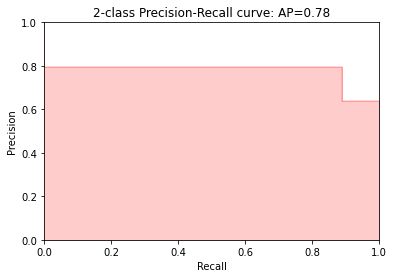

In [50]:
# Plotting the precision-call curve

precision, recall, threshold = precision_recall_curve(y_test_white_classify, best_random_y_pred_white_classify)

step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
x = plt.xlabel('Recall')
y = plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [51]:
# To calculate the probability 

roc_y_pred_white_classify = best_random_white_wine_classify.predict_proba(X_test_white_classify)
roc_y_pred_white_classify

array([[0.65, 0.35],
       [0.27, 0.73],
       [0.53, 0.47],
       ...,
       [0.06, 0.94],
       [0.1 , 0.9 ],
       [0.6 , 0.4 ]])

In [52]:
# Calculating the roc_auc for class of good wine

good_white_wine = roc_y_pred_white_classify[:,1]
fpr, tpr, thresholds = roc_curve(y_test_white_classify, good_white_wine)
roc_auc = auc(fpr, tpr)
roc_auc

0.8464149420226038

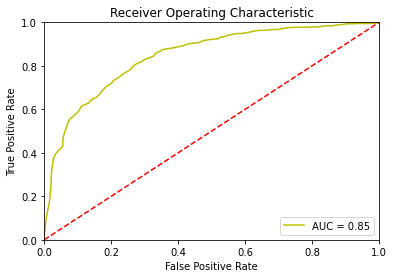

In [53]:
# Plotting the roc_auc curve

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

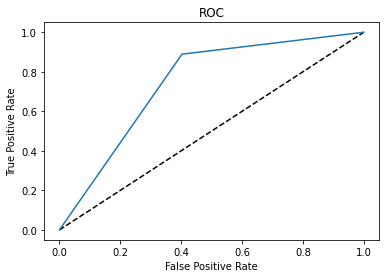

In [54]:
#ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_white_classify, best_random_y_pred_white_classify)
plt.plot([0,1], [0,1], '--k')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [56]:
# Calculating the roc_auc score

roc_auc_score(y_test_white_classify,best_random_y_pred_white_classify)

0.7431289446646119

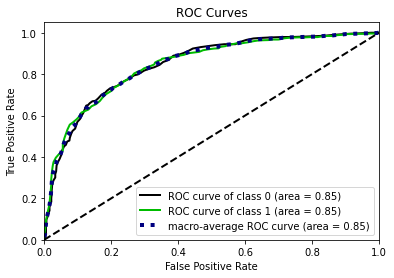

In [57]:
# Plotting the roc_auc curve

skplt.metrics.plot_roc(y_test_white_classify, roc_y_pred_white_classify, plot_micro=False)
plt.show()

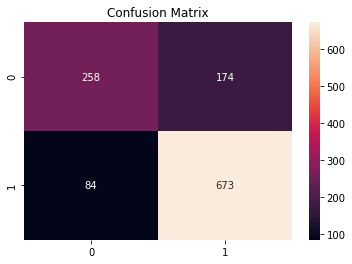

In [58]:
# Forming the confusion matrix

cm_white_wine_classify = confusion_matrix(y_test_white_classify, best_random_y_pred_white_classify)
sns.heatmap(cm_white_wine_classify, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [59]:
# Forming the classification report

print(classification_report(y_test_white_classify, best_random_y_pred_white_classify))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67       432
           1       0.79      0.89      0.84       757

    accuracy                           0.78      1189
   macro avg       0.77      0.74      0.75      1189
weighted avg       0.78      0.78      0.78      1189



#### For White Wine dataset : Regression using Random Forest Regressor

In [60]:
# Importing libraries for regression

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [61]:
# Dividing the data into training and test data in the ration of 7:3

X_train_white_reg, X_test_white_reg, y_train_white_reg, y_test_white_reg = train_test_split(X_white_reg, y_white_reg, test_size=.30, random_state=10)

In [62]:
# Fitting the Random Forest Regresion model

white_wine_rf_reg = RandomForestRegressor(n_estimators=100,random_state = 0)
white_wine_rf_reg.fit(X_train_white_reg, y_train_white_reg)

RandomForestRegressor(random_state=0)

In [63]:
# Model prediction on test data

y_pred_white_reg = white_wine_rf_reg.predict(X_test_white_reg)

In [64]:
# Fine tuning with randomized search

from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint


random_grid={'criterion':['mse','mae'], 
                'max_depth':[1,2,3,4,5,6,7,None]}

pprint(random_grid)

{'criterion': ['mse', 'mae'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}


In [66]:
# Creating the randomized search model
white_wine_rf_reg_random = RandomizedSearchCV(estimator = white_wine_rf_reg, param_distributions = random_grid, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fitting the randomized search model
white_wine_rf_reg_random.fit(X_train_white_reg, y_train_white_reg)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  7.3min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7,
                                                      None]},
                   random_state=42, verbose=2)

In [67]:
# Selecting the best parameter

white_wine_rf_reg_random.best_params_

{'max_depth': None, 'criterion': 'mae'}

In [68]:
# Selecting the best estimator

best_random_white_wine_reg= white_wine_rf_reg_random.best_estimator_
best_random_white_wine_reg

RandomForestRegressor(criterion='mae', random_state=0)

In [69]:
# Model prediction on test data

best_random_y_pred_white_reg = best_random_white_wine_reg.predict(X_test_white_reg)

#### Evaluation metrics

In [70]:
# Evaluating the accuracy of the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_white_reg,best_random_y_pred_white_reg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_white_reg,best_random_y_pred_white_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_white_reg,best_random_y_pred_white_reg)))
print('R2_Score:', metrics.r2_score(y_test_white_reg,best_random_y_pred_white_reg))

Mean Absolute Error: 0.553036164844407
Mean Squared Error: 0.5132869638351556
Root Mean Squared Error: 0.7164404817116042
R2_Score: 0.38577884334428647


#### For Red Wine dataset : Classification using Random Forest Classifier

In [71]:
# Importing libraries for data modelling

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [72]:
# Dividing the data into training and test data in the ration of 7:3

X_train_red_classify, X_test_red_classify, y_train_red_classify, y_test_red_classify = train_test_split(X_red_classify, y_red_classify, test_size=.30, random_state=10)

In [73]:
# Fitting the Random Forest Classification model

red_wine_rf_classify = RandomForestClassifier(n_estimators=100,random_state = 0)
red_wine_rf_classify.fit(X_train_red_classify, y_train_red_classify)

RandomForestClassifier(random_state=0)

In [74]:
# Model prediction on test data

y_pred_red_classify = red_wine_rf_classify.predict(X_test_red_classify)

In [75]:
# Calculating the accuracy of the prediction

red_wine_classify_accuracy=accuracy_score(y_test_red_classify,y_pred_red_classify)*100
red_wine_classify_accuracy

74.50980392156863

In [76]:
# Forming the classification report

print(classification_report(y_test_red_classify, y_pred_red_classify))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       194
           1       0.76      0.74      0.75       214

    accuracy                           0.75       408
   macro avg       0.74      0.75      0.74       408
weighted avg       0.75      0.75      0.75       408



In [78]:
# Fine tuning with randomized search

from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint

random_grid={'criterion':['gini','entropy'], 
                'max_depth':[1,2,3,4,5,6,7,None]}

pprint(random_grid)

{'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}


In [79]:
# Creating the randomized search model
red_wine_rf_classify_random = RandomizedSearchCV(estimator = red_wine_rf_classify, param_distributions = random_grid,  cv = 100, verbose=2, random_state=42, n_jobs = -1)

# Fitting the randomized search model
red_wine_rf_classify_random.fit(X_train_red_classify, y_train_red_classify)

Fitting 100 folds for each of 10 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   45.4s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  1.2min finished


RandomizedSearchCV(cv=100, estimator=RandomForestClassifier(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7,
                                                      None]},
                   random_state=42, verbose=2)

In [80]:
# Selecting the best parameter

red_wine_rf_classify_random.best_params_

{'max_depth': 6, 'criterion': 'gini'}

In [81]:
# Selecting the best estimator

best_random_red_wine_classify= red_wine_rf_classify_random.best_estimator_
best_random_red_wine_classify

RandomForestClassifier(max_depth=6, random_state=0)

In [82]:
# Model prediction on test data

best_random_y_pred_red_classify = best_random_red_wine_classify.predict(X_test_red_classify)

In [83]:
# Calculating the accuracy of the prediction

best_random_red_wine_classify_accuracy=accuracy_score(y_test_red_classify,best_random_y_pred_red_classify)*100
best_random_red_wine_classify_accuracy

74.01960784313727

In [84]:
# Comparing the model accuracy before and after fine tuning

print('Before :', red_wine_classify_accuracy,'\n' 'After : ', best_random_red_wine_classify_accuracy)

Before : 74.50980392156863 
After :  74.01960784313727


#### Evaluation metrices

In [85]:
# Importing the libraries for evalution metric

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from inspect import signature

In [86]:
# Calculating the precision score

precision_score(y_test_red_classify, best_random_y_pred_red_classify)

0.7547169811320755

In [87]:
# Calculating the recall score

recall_score(y_test_red_classify, best_random_y_pred_red_classify)

0.7476635514018691

In [88]:
# Calculating the f1 score

f1_score(y_test_red_classify, best_random_y_pred_red_classify)

0.7511737089201879

In [89]:
# Calculating the average precision score

average_precision = average_precision_score(y_test_red_classify, best_random_y_pred_red_classify)
average_precision

0.6966273195929757

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.70')

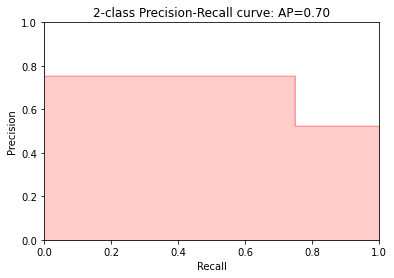

In [90]:
# Plotting the precision-call curve

precision, recall, threshold = precision_recall_curve(y_test_red_classify, best_random_y_pred_red_classify)

step_kwargs = ({'step': 'post'} if 'step' in signature(plt.fill_between).parameters else {})
plt.step(recall, precision, color='r', alpha=0.2, where='post')
plt.fill_between(recall, precision, alpha=0.2, color='r', **step_kwargs)
x = plt.xlabel('Recall')
y = plt.ylabel('Precision')
plt.ylim([0.0, 1.0])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

In [91]:
# To calculate the probability 

roc_y_pred_red_classify = best_random_red_wine_classify.predict_proba(X_test_red_classify)
roc_y_pred_red_classify

array([[0.07113596, 0.92886404],
       [0.44078985, 0.55921015],
       [0.44935237, 0.55064763],
       [0.82275372, 0.17724628],
       [0.52682839, 0.47317161],
       [0.47077827, 0.52922173],
       [0.69509626, 0.30490374],
       [0.07215872, 0.92784128],
       [0.4483931 , 0.5516069 ],
       [0.10076792, 0.89923208],
       [0.56938644, 0.43061356],
       [0.63912207, 0.36087793],
       [0.1558918 , 0.8441082 ],
       [0.75284118, 0.24715882],
       [0.78027487, 0.21972513],
       [0.17256514, 0.82743486],
       [0.47189861, 0.52810139],
       [0.62024406, 0.37975594],
       [0.28567887, 0.71432113],
       [0.28474858, 0.71525142],
       [0.497603  , 0.502397  ],
       [0.3967881 , 0.6032119 ],
       [0.13353159, 0.86646841],
       [0.76497579, 0.23502421],
       [0.23343589, 0.76656411],
       [0.87143956, 0.12856044],
       [0.58033351, 0.41966649],
       [0.15285778, 0.84714222],
       [0.73447457, 0.26552543],
       [0.47893542, 0.52106458],
       [0.

In [92]:
# Calculating the roc_auc for class of good wine

good_red_wine = roc_y_pred_red_classify[:,1]
fpr, tpr, thresholds = roc_curve(y_test_red_classify, good_red_wine)
roc_auc = auc(fpr, tpr)
roc_auc

0.8089652182291165

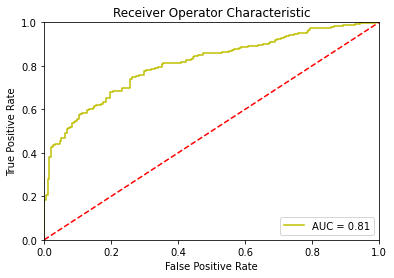

In [93]:
# Plotting the roc_auc curve

plt.title('Receiver Operator Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

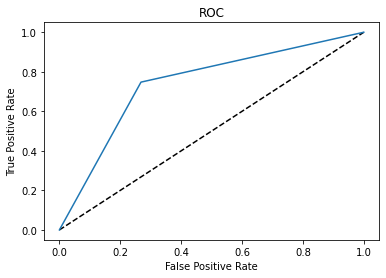

In [94]:
#ROC
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_red_classify, best_random_y_pred_red_classify)
plt.plot([0,1], [0,1], '--k')
plt.plot(fpr_rf, tpr_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [96]:
# Calculating the roc_auc score

roc_auc_score(y_test_red_classify,best_random_y_pred_red_classify)

0.7398111571442336

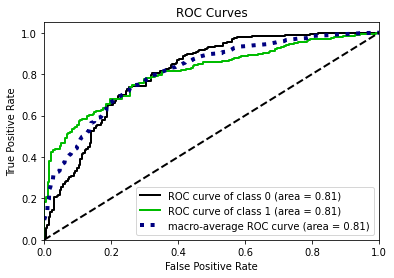

In [97]:
# Plotting the roc_auc curve

skplt.metrics.plot_roc(y_test_red_classify, roc_y_pred_red_classify, plot_micro=False)
plt.show()

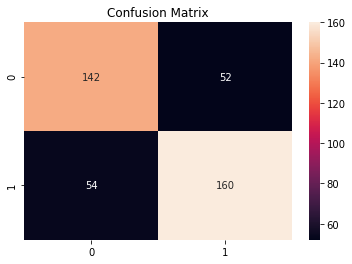

In [98]:
# Forming the confusion matrix

cm_red_wine_classify = confusion_matrix(y_test_red_classify, best_random_y_pred_red_classify)
sns.heatmap(cm_red_wine_classify, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.show()

In [99]:
# Forming the classification report

print(classification_report(y_test_red_classify, best_random_y_pred_red_classify))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       194
           1       0.75      0.75      0.75       214

    accuracy                           0.74       408
   macro avg       0.74      0.74      0.74       408
weighted avg       0.74      0.74      0.74       408



#### For Red Wine dataset : Regression using Random Forest Regressor

In [100]:
# Importing libraries for regression

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [101]:
# Dividing the data into training and test data in the ration of 7:3

X_train_red_reg, X_test_red_reg, y_train_red_reg, y_test_red_reg = train_test_split(X_red_reg, y_red_reg, test_size=.30, random_state=10)

In [102]:
# Fitting the Random Forest Regresion model

red_wine_rf_reg = RandomForestRegressor(n_estimators=100,random_state = 0)
red_wine_rf_reg.fit(X_train_red_reg, y_train_red_reg)

RandomForestRegressor(random_state=0)

In [103]:
# Model prediction on test data

y_pred_red_reg = red_wine_rf_reg.predict(X_test_red_reg)

In [104]:
# Fine tuning with randomized search

from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint


random_grid={'criterion':['mse','mae'], 
                'max_depth':[1,2,3,4,5,6,7,None]}

pprint(random_grid)

{'criterion': ['mse', 'mae'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}


In [106]:
# Creating the randomized search model
red_wine_rf_reg_random = RandomizedSearchCV(estimator = red_wine_rf_reg, param_distributions = random_grid, cv = 10, verbose=2, random_state=42, n_jobs = -1)

# Fitting the randomized search model
red_wine_rf_reg_random.fit(X_train_red_reg, y_train_red_reg)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   59.4s finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0),
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse', 'mae'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7,
                                                      None]},
                   random_state=42, verbose=2)

In [107]:
# Selecting the best parameter

red_wine_rf_reg_random.best_params_

{'max_depth': 6, 'criterion': 'mse'}

In [108]:
# Selecting the best estimator

best_random_red_wine_reg= red_wine_rf_reg_random.best_estimator_
best_random_red_wine_reg

RandomForestRegressor(max_depth=6, random_state=0)

In [109]:
# Model prediction on test data

best_random_y_pred_red_reg = best_random_red_wine_reg.predict(X_test_red_reg)

#### Evaluation metric

In [110]:
# Evaluating the accuracy of the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_red_reg,best_random_y_pred_red_reg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_red_reg,best_random_y_pred_red_reg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_red_reg,best_random_y_pred_red_reg)))
print('R2_Score:', metrics.r2_score(y_test_red_reg,best_random_y_pred_red_reg))

Mean Absolute Error: 0.5193914024035241
Mean Squared Error: 0.4497040190935046
Root Mean Squared Error: 0.6705997458197435
R2_Score: 0.36660634045435114
